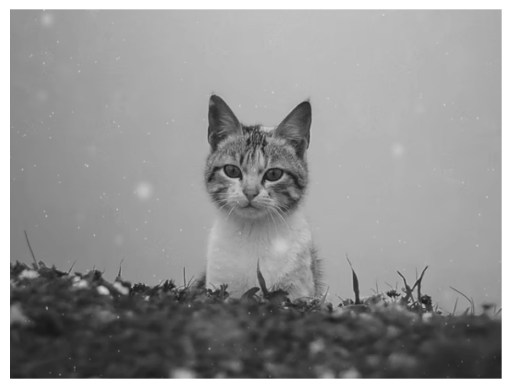

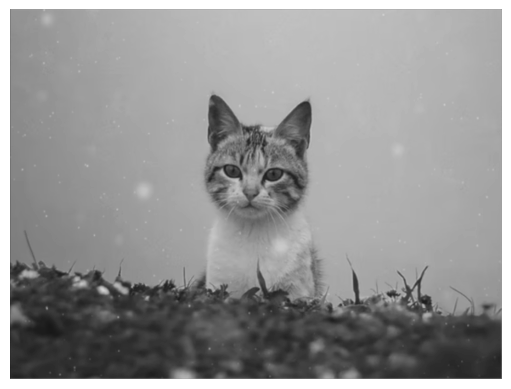

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def convert_image_to_grayscale(image_path):
    img = Image.open(image_path).convert('L')
    gray_matrix = np.array(img)
    return gray_matrix

def display_image(matrix, cmap='gray'):
    plt.imshow(matrix, cmap=cmap, vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

def weighted_averaging_filter(matrix, kernel_size=3):
    m, n = matrix.shape
    smoothed_matrix = np.zeros((m, n))
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
    pad_size = kernel_size // 2
    padded_matrix = np.pad(matrix, pad_size, mode='constant', constant_values=0)
    for i in range(m):
        for j in range(n):
            region = padded_matrix[i:i+kernel_size, j:j+kernel_size]
            smoothed_matrix[i, j] = np.sum(region * kernel)
    return smoothed_matrix

def process_image(image_path):
    gray_matrix = convert_image_to_grayscale(image_path)
    smoothed_matrix = weighted_averaging_filter(gray_matrix, kernel_size=3)
    display_image(gray_matrix)
    display_image(smoothed_matrix)

process_image('image.jpeg')
